# **ECON 441B: Week 6 Assignment**
Courtney Manhart

# 1.) Preprocess your data into scaled input variables and an output variable


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Week 6/CLV.csv")
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [4]:
df = df.drop('Unnamed: 0', axis = 1)
df

,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [5]:
y = df['Customer Lifetime Value']
X = df.drop('Customer Lifetime Value', axis = 1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler().fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [8]:
X_train.shape

(6393, 16)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

clf = MLPRegressor()
params = {'hidden_layer_sizes':[(25,), (20,100,), (20,50,5,),
                               (20, 150, 50, 5,)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001]
}

grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train_scale, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(25,), (20, 100), (20, 50, 5),
                                                (20, 150, 50, 5)]})

In [10]:
print('Best Parameters:', grid.best_params_)
print('Best Score:', grid.best_score_)

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 150, 50, 5)}
Best Score: 0.07503151236831576


# 3.) Train a model with the optimal solution from GridSearch

In [11]:
model = MLPRegressor(**grid.best_params_).fit(X_train_scale, y_train)

# 4.) What are the in-sample and out of sample MSEs

In [12]:
# Calculating the MSEs 

### In Sample MSE
from sklearn.metrics import mean_squared_error

in_pred = model.predict(X_train_scale)

in_MSE = mean_squared_error(y_train, in_pred)

print('In-sample MSE:', in_MSE)

### Out of Sample MSE
out_pred = model.predict(X_test_scale)

out_MSE = mean_squared_error(y_test, out_pred)

print('Out of Sample MSE:', out_MSE)


In-sample MSE: 43272642.96586055
Out of Sample MSE: 41308173.400380045


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [13]:
# Import Packages
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [14]:
# Creating the Architecture for the Neural Network


inputdim = X_train.shape[1]
layer_1 = 20
layer_2 = 150
layer_3 = 50
layer_4 = 5
act = 'relu'
alpha = 0.001



model = Sequential()
model.add(Dense(layer_1, input_dim = inputdim, activation = act))
model.add(Dense(layer_2, activation = act))
model.add(Dense(layer_3, activation = act))
model.add(Dense(layer_4, activation = act))
model.add(Dense(1, activation= 'softmax'))    # Adding the Output layer


# Training the Model
model.compile(loss = 'mse', optimizer = Adam(lr = alpha))
model.fit(X_train_scale, y_train, batch_size = 32, epochs=100)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 112806776.0000
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 112806736.0000
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 112806768.0000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 112806768.0000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 112806800.0000
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 112806768.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 112806808.0000
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 112806800.0000
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 112806760.0000
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 112806808.0000
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 112806824.0000
Epoch 12

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [17]:
# Print the Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                340       
                                                                 
 dense_1 (Dense)             (None, 150)               3150      
                                                                 
 dense_2 (Dense)             (None, 50)                7550      
                                                                 
 dense_3 (Dense)             (None, 5)                 255       
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 11,301
Trainable params: 11,301
Non-trainable params: 0
_________________________________________________________________


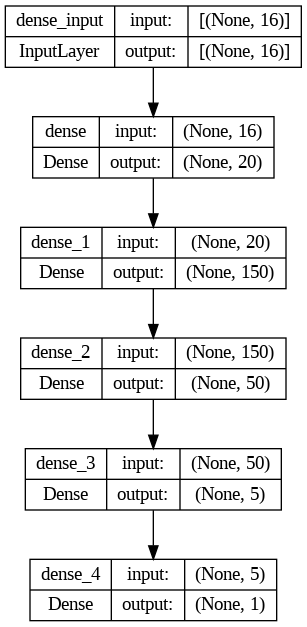

In [18]:
# Plot the Neural Network
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

In [29]:
# Plot the Ann Visualizer
from ann_visualizer.visualize import ann_viz

ann_viz(model, title = 'CLV NN Viz', 
        filename = '/content/gdrive/MyDrive/ECON441B/Week 6/nn_model.gv')